# Simulation

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2024-10-24

**Abstract**: This lecture will introduce the notion of simulation and
review the different types of simulation we might use to represent the
physical world.

$$
$$

::: {.cell .markdown}

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Last lecture Carl Henrik introduced you to some of the challenges of
approximate inference. Including the problem of mathematical
tractability. Before that he introduced you to a particular form of
model, the Gaussian process.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

<!--setupplotcode{import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set_palette('colorblind')}-->

## notutils

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/notutils-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This small package is a helper package for various notebook utilities
used below.

The software can be installed using

In [2]:
%pip install notutils

  Using cached notutils-0.0.1-py3-none-any.whl.metadata (693 bytes)
Using cached notutils-0.0.1-py3-none-any.whl (4.5 kB)
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub:
<https://github.com/lawrennd/notutils>

Once `notutils` is installed, it can be imported in the usual manner.

In [3]:
import notutils

## mlai

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/mlai-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The `mlai` software is a suite of helper functions for teaching and
demonstrating machine learning algorithms. It was first used in the
Machine Learning and Adaptive Intelligence course in Sheffield in 2013.

The software can be installed using

In [4]:
%pip install mlai

  Using cached pods-0.1.14-py2.py3-none-any.whl.metadata (1.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 862.7 kB/s eta 0:00:00 0:00:01
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.9 MB/s eta 0:00:00
Using cached pods-0.1.14-py2.py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 18.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 7.4 MB/s eta 0:00:00
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


from the command prompt where you can access your python installation.

The code is also available on GitHub: <https://github.com/lawrennd/mlai>

Once `mlai` is installed, it can be imported in the usual manner.

In [17]:
import mlai

# The Structure of Scientific Revolutions

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_books/includes/the-structure-of-scientific-revolutions.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_books/includes/the-structure-of-scientific-revolutions.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//books/structure-of-scientific-revolutions.png" style="width:40%">

Figure: <i>[The Structure of Scientific Revolutions by Thomas S.
Kuhn](https://en.wikipedia.org/wiki/The_Structure_of_Scientific_Revolutions)
suggests scientific paradigms are recorded in books.</i>

Kuhn was a historian of science and a philosopher who suggested that the
sociology of science has two principal components to it. His idea is
that “normal science” operates within a paradigm That paradigm is
defined by books which encode our best understanding. An example of a
paradigm is Newtonian mechanics, or another example would be the
geocentric view of the Universe. Within a paradigm normal science
proceeds by scientists solving the “puzzles” that paradigm sets. A
paradigm shift is when the paradigm changes, for example the Corpernican
revolution or the introduction of relativity.

The notion of a paradigm shift has also entered common parlance, this
reflects the idea that wider human knowledge is also shared and stored,
less ormally than scientific knowledge, but still with a dependence on
our information infrastructure.

The digital computer has brought a fundamental change in the nature of
that information infrastructure. By moving information faster the modern
information infrastructure is dominated not by the book, but by the
machine. This brings challenges for managing and controlling this
information infrastructure.

See Lawrence (2024) Kuhn, Thomas: *The Structure of Scientific
Revolutions* p. 295–299.

## Wolfram Automata

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-automata.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/wolfram-automata.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Cellular automata are systems with simple rules that lead to complex
behaviours. A simple cellular automata can be defined over one dimension
of cells binary cells, and a discrete time evolution. At each time step
a cell’s state is dependent on its state in a previous time step and
that of its neighbours.

Stephen Wolfram noticed that such systems could be represented by a
binary number that described the nature of these rules. Each cell ($x$)
has a state at time $t$, and the state of two neighbours ($x+1$ and
$x-1$ at time $t$. The cellular automata dictates what the value of that
cell will be at time $t+1$. The possible values of the cell are $1$ or
$0$.

This simple system has eight different input states (three bits
associated with the cell and its two neighbours). And two possible
output states (one bit associated with the cell’s output state). so the
rules of the cellular automata can be expressed by exhaustively running
through the eight different input states giving the output state. To do
this requires a string of eight bits (or a byte) long: one output per
different input. That means there are 256 different possible cellular
automata.

Wolfram numbered the different cellular automata according to the output
states in an 8 bit binary number, each bit indexed by the three bits of
the input states (most significant bit first). So Rule 0 would give zero
output regardless of the input state. Rule 1 will give an output of 1
for the input state of three zeros etc and Rule 255 will give an output
of 1 regardless of the input state.

In [18]:
def generate_rule_markdown_table(rule_number):
    """Generate a Markdown table explaining a cellular automaton rule"""
    rule_binary = format(rule_number, '08b')
    
    # Create table header
    table = "| Pattern | Result | Binary Position | Rule Bit |\n"
    table += "|---------|---------|----------------|----------|\n"
    
    # Create patterns
    neighborhoods = [
        (1,1,1), (1,1,0), (1,0,1), (1,0,0),
        (0,1,1), (0,1,0), (0,0,1), (0,0,0)
    ]
    
    # Add each row
    for i, pattern in enumerate(neighborhoods):
        pattern_str = ''.join(['■' if x == 1 else '□' for x in pattern])
        result = '■' if rule_binary[i] == '1' else '□'
        table += f"| {pattern_str} | {result} | {7-i} | {rule_binary[i]} |\n"
    
    
    return table

In [19]:
markdown = generate_rule_markdown_table(1)
print(markdown)

| Pattern | Result | Binary Position | Rule Bit |
|---------|---------|----------------|----------|
| ■■■ | □ | 7 | 0 |
| ■■□ | □ | 6 | 0 |
| ■□■ | □ | 5 | 0 |
| ■□□ | □ | 4 | 0 |
| □■■ | □ | 3 | 0 |
| □■□ | □ | 2 | 0 |
| □□■ | □ | 1 | 0 |
| □□□ | ■ | 0 | 1 |



## Wolfram Automata Coding

| Pattern | Result | Binary Position | Rule Bit |
|:--------|:-------|:----------------|:---------|
| ■■■     | □      | 7               | 0        |
| ■■□     | □      | 6               | 0        |
| ■□■     | □      | 5               | 0        |
| ■□□     | □      | 4               | 0        |
| □■■     | □      | 3               | 0        |
| □■□     | □      | 2               | 0        |
| □□■     | □      | 1               | 0        |
| □□□     | ■      | 0               | 1        |

The rule number 1 in binary is: 00000001

Each bit in the binary number determines the result for one of the eight
possible patterns of three cells:

-   A foreground square (■) represents a cell in state 1
-   A background square (□) represents a cell in state 0
-   The patterns are ordered from 111 (7) to 000 (0)
-   The binary number determines the next state of the center cell for
    each pattern

For example:

-   If you see pattern ‘111’ (■■■), the next state will be {‘■’ if
    rule_binary\[0\] == ‘1’ else ‘□’}
-   If you see pattern ‘110’ (■■□), the next state will be {‘■’ if
    rule_binary\[1\] == ‘1’ else ‘□’}

And so on…

At each time step:

1.  Look at each cell and its two neighbors
2.  Find this pattern in the table above
3.  The center cell becomes the value shown in the ‘Result’ column

In [20]:
def generate_rule_explanation_svg(rule_number, cell_size=30):
    """
    Generate an SVG visualization of how a specific Wolfram rule works
    """
    
    rule_binary = format(rule_number, '08b')
    
    # Define dimensions
    pattern_width = 3 * cell_size
    pattern_height = cell_size
    total_width = 8 * (pattern_width + cell_size)  # Extra space between patterns
    total_height = 3 * pattern_height
    
    neighborhoods = [
        (1,1,1), (1,1,0), (1,0,1), (1,0,0),
        (0,1,1), (0,1,0), (0,0,1), (0,0,0)
    ]
    
    svg = f'''<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {total_width} {total_height}">
    <style>
        .label {{ font: bold {cell_size//2}px sans-serif; }}
    </style>
    '''
    
    # Draw each neighborhood pattern and its result
    for i, (neighborhood) in enumerate(neighborhoods):
        x_offset = i * (pattern_width + cell_size)
        
        # Draw input pattern (top row)
        for j, cell in enumerate(neighborhood):
            x = x_offset + j * cell_size
            if cell == 1:
                svg += f'<rect x="{x}" y="0" width="{cell_size}" height="{cell_size}" fill="black" stroke="gray"/>'
            else:
                svg += f'<rect x="{x}" y="0" width="{cell_size}" height="{cell_size}" fill="white" stroke="gray"/>'
        
        # Draw arrow
        arrow_y = pattern_height + cell_size//2
        svg += f'<line x1="{x_offset + pattern_width//2}" y1="{pattern_height + 5}" x2="{x_offset + pattern_width//2}" y2="{2*pattern_height - 5}" stroke="black" marker-end="url(#arrowhead)"/>'
        
        # Draw result (bottom row)
        result = int(rule_binary[i])
        x = x_offset + cell_size
        y = 2 * pattern_height
        if result == 1:
            svg += f'<rect x="{x}" y="{y}" width="{cell_size}" height="{cell_size}" fill="black" stroke="gray"/>'
        else:
            svg += f'<rect x="{x}" y="{y}" width="{cell_size}" height="{cell_size}" fill="white" stroke="gray"/>'
    
        # Add binary value label
        svg += f'<text x="{x_offset + pattern_width//2}" y="{total_height + cell_size//2}" text-anchor="middle" class="label">{rule_binary[i]}</text>'
    
    # Add arrowhead definition
    svg += '''
    <defs>
        <marker id="arrowhead" markerWidth="10" markerHeight="7" refX="9" refY="3.5" orient="auto">
            <polygon points="0 0, 10 3.5, 0 7" fill="black"/>
        </marker>
    </defs>
    '''
    
    svg += '</svg>'
    return svg

In [21]:
svg = generate_rule_explanation_svg(1)
with open("../slides/diagrams/simulation/rule-001_explanation.svg", 'w') as f:
  f.write(svg)

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-001_explanation.svg" class="" width="95%" style="vertical-align:middle;">

Figure: <i>Rule 1 expressed in pixel form.</i>

## Rule 30

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/rule-30.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/rule-30.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Wolfram explored exhaustively the different automata, and [discovered
that Rule
30](But%20the%20surprising%20%5Bdiscovery%20I%20made%20in%20the%201980s%5D(https://content.wolfram.com/sw-publications/2020/07/origins-randomness-physical-systems.pdf))
exhibited particularly interesting behaviour.

| Pattern | Result | Binary Position | Rule Bit |
|:--------|:-------|:----------------|:---------|
| ■■■     | □      | 7               | 0        |
| ■■□     | □      | 6               | 0        |
| ■□■     | □      | 5               | 0        |
| ■□□     | ■      | 4               | 1        |
| □■■     | ■      | 3               | 1        |
| □■□     | ■      | 2               | 1        |
| □□■     | ■      | 1               | 1        |
| □□□     | □      | 0               | 0        |

The rule number 30 in binary is: 00011110

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//slides/simulation/rule-030_explanation.svg" class="" width="95%" style="vertical-align:middle;">

Figure: <i>Rule 30 expressed in pixel form.</i>

In [22]:
import numpy as np

In [23]:
def rule_30(size, steps):
    # Initialize the cellular automaton
    ca = np.zeros((steps, size), dtype=int)
    ca[0, size // 2] = 1  # Set the middle cell of the first row to 1
    
    # Define Rule 30
    rule = {(1,1,1): 0, (1,1,0): 0, (1,0,1): 0, (1,0,0): 1,
            (0,1,1): 1, (0,1,0): 1, (0,0,1): 1, (0,0,0): 0}
    
    # Evolve the cellular automaton
    for i in range(1, steps):
        for j in range(size):
            left = ca[i-1, (j-1) % size]
            center = ca[i-1, j]
            right = ca[i-1, (j+1) % size]
            ca[i, j] = rule[(left, center, right)]
    
    return ca

In [24]:
# Set parameters
size = 101
steps = 50

# Generate the cellular automaton
ca = rule_30(size, steps)

In [25]:
import matplotlib.pyplot as plt

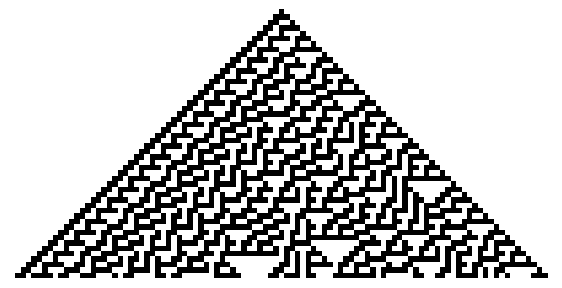

In [29]:

# Plot the result
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(ca, cmap='binary')
ax.axis('off')


mlai.write_figure(filename='rule-030-progression.svg', directory='./simulation')

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-030-progression.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Progression of Rule 30 with a single cell on as the initial
condition.</i>

## Rule 30 in Cambridge

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/rule-030-cambridge-north.jpg" style="width:70%">

Figure: <i>Rule 30 has been used to decorate Cambridge North station
with aluminium cladding.</i>

> But the surprising [discovery I made in the
> 1980s](https://content.wolfram.com/sw-publications/2020/07/origins-randomness-physical-systems.pdf)
> by looking at things like rule 30 is that actually no such “external
> source” is needed: instead, it’s perfectly possible for [randomness to
> be generated
> intrinsically](https://www.wolframscience.com/nks/chap-7--mechanisms-in-programs-and-nature#sect-7-5--the-intrinsic-generation-of-randomness)
> within a system just through the process of applying definite
> underlying rules.

## Game of Life

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/game-of-life.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/game-of-life.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

[John Horton Conway](https://en.wikipedia.org/wiki/John_Horton_Conway)
was a mathematician who developed a game known as the Game of Life. He
died in April 2020, but since he invented the game, he was in effect
‘god’ for this game. But as we will see, just inventing the rules
doesn’t give you omniscience in the game.

The Game of Life is played on a grid of squares, or pixels. Each pixel
is either on or off. The game has no players, but a set of simple rules
that are followed at each turn the rules are.

## Life Rules

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-rules.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-rules.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

John Conway’s game of life is a cellular automaton where the cells obey
three very simple rules. The cells live on a rectangular grid, so that
each cell has 8 possible neighbors.

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-1-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*loneliness*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-1-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>‘Death’ through loneliness in Conway’s game of life. If a
cell is surrounded by less than three cells, it ‘dies’ through
loneliness.</i>

The game proceeds in turns, and at each location in the grid is either
alive or dead. Each turn, a cell counts its neighbors. If there are two
or fewer neighbors, the cell ‘dies’ of ‘loneliness’.

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-2-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*overcrowding*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-2-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>‘Death’ through overpopulation in Conway’s game of life. If a
cell is surrounded by more than three cells, it ‘dies’ through
loneliness.</i>

If there are four or more neighbors, the cell ‘dies’ from
‘overcrowding’. If there are three neighbors, the cell persists, or if
it is currently dead, a new cell is born.

<table>
<tr>
<td width="70%">
<table>
<tr>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-3-0.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
<td width="39%">
<center>

*birth*

</center>
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//util/right-arrow.svg" class="" width="60%" style="vertical-align:middle;">

</center>
</td>
<td width="30%">
<center>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-rules-3-1.svg" class="" width="100%" style="vertical-align:middle;">

</center>
</td>
</tr>
</table>
</td>
<td width="30%">
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:100%">

</center>
</td>
</tr>
</table>

Figure: <i>Birth in Conway’s life. Any position surrounded by precisely
three live cells will give birth to a new cell at the next turn.</i>

And that’s it. Those are the simple ‘physical laws’ for Conway’s game.

The game leads to patterns emerging, some of these patterns are static,
but some oscillate in place, with varying periods. Others oscillate, but
when they complete their cycle they’ve translated to a new location, in
other words they move. In Life the former are known as
[oscillators](https://conwaylife.com/wiki/Oscillator) and the latter as
[spaceships](https://conwaylife.com/wiki/Spaceship).

## Loafers and Gliders

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-glider-loafer-conway.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/life-glider-loafer-conway.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

John Horton Conway, as the creator of the game of life, could be seen
somehow as the god of this small universe. He created the rules. The
rules are so simple that in many senses he, and we, are all-knowing in
this space. But despite our knowledge, this world can still ‘surprise’
us. From the simple rules, emergent patterns of behaviour arise. These
include static patterns that don’t change from one turn to the next.
They also include, oscillators, that pulse between different forms
across different periods of time. A particular form of oscillator is
known as a ‘spaceship’, this is one that moves across the board as the
game evolves. One of the simplest and earliest spaceships to be
discovered is known as the glider.

<table>
<tr>
<td width="45%">
<center>

*Glider (1969)*

</center>
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/Glider.gif" style="width:80%">

</center>
</td>
<td width="45%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:80%">

</td>
</tr>
</table>

Figure: <i>*Left* A Glider pattern discovered 1969 by Richard K. Guy.
*Right*. John Horton Conway, creator of *Life* (1937-2020). The glider
is an oscillator that moves diagonally after creation. From the simple
rules of Life it’s not obvious that such an object does exist, until you
do the necessary computation.</i>

The glider was ‘discovered’ in 1969 by Richard K. Guy. What do we mean
by discovered in this context? Well, as soon as the game of life is
defined, objects such as the glider do somehow exist, but the many
configurations of the game mean that it takes some time for us to see
one and know it exists. This means, that despite being the creator,
Conway, and despite the rules of the game being simple, and despite the
rules being deterministic, we are not ‘omniscient’ in any simplistic
sense. It requires computation to ‘discover’ what can exist in this
universe once it’s been defined.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/Gosperglidergun.gif" style="width:80%">

Figure: <i>The Gosper glider gun is a configuration that creates
gliders. A new glider is released after every 30 turns.</i>

These patterns had to be discovered, in the same way that a scientist
might discover a disease, or an explorer a new land. For example, the
Gosper glider gun was [discovered by Bill Gosper in
1970](https://conwaylife.com/wiki/Bill_Gosper). It is a pattern that
creates a new glider every 30 turns of the game.

Despite widespread interest in Life, some of its patterns were only very
recently discovered like the Loafer, discovered in 2013 by Josh Ball.
So, despite the game having existed for over forty years, and the rules
of the game being simple, there are emergent behaviors that are unknown.

<table>
<tr>
<td width="45%">
<center>

*Loafer (2013)*

</center>
<center>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/Loafer.gif" style="width:80%">

</center>
</td>
<td width="45%">

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//maths/John-Conway.jpg" style="width:80%">

</td>
</tr>
</table>

Figure: <i>*Left* A Loafer pattern discovered by Josh Ball in 2013.
*Right*. John Horton Conway, creator of *Life* (1937-2020).</i>

Once these patterns are discovered, they are combined (or engineered) to
create new Life patterns that do some remarkable things. For example,
there’s a life pattern that runs a Turing machine, or more remarkably
there’s a Life pattern that runs Life itself.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/life-in-life.gif" style="width:80%">

Figure: <i>The Game of Life running in Life. The video is drawing out
recursively showing pixels that are being formed by filling cells with
moving spaceships. Each individual pixel in this game of life is made up
of $2048 \times 2048$ pixels called an [OTCA
metapixel](https://www.conwaylife.com/wiki/OTCA_metapixel).</i>

To find out more about the Game of Life you can watch this video by Alan
Zucconi or read his [associated blog
post](https://www.alanzucconi.com/2020/10/13/conways-game-of-life/).

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Kk2MH9O4pXY')

Figure: <i>An introduction to the Game of Life by Alan Zucconi.</i>

Contrast this with our situation where in ‘real life’ we don’t know the
simple rules of the game, the state space is larger, and emergent
behaviors (hurricanes, earthquakes, volcanos, climate change) have
direct consequences for our daily lives, and we understand why the
process of ‘understanding’ the physical world is so difficult. We also
see immediately how much easier we might expect the physical sciences to
be than the social sciences, where the emergent behaviors are contingent
on highly complex human interactions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [ ]:
class FlowingAutomata:
    def __init__(self, width: int, height: int, wolfram_portion: float = 0.5):
        """
        Initialize flowing display where Wolfram patterns flow into Conway's Game of Life

        Inspired by Elliot Waite <https://www.youtube.com/watch?v=IK7nBOLYzdE>
        Args:
            width: Total width of the display in pixels
            height: Height of the display in pixels
            wolfram_portion: Portion of width for Wolfram's automaton (0-1)
        """
        self.width = width
        self.height = height
        self.wolfram_portion = wolfram_portion
        
        # Calculate section widths
        self.wolfram_width = int(width * wolfram_portion)
        self.conway_width = width - self.wolfram_width
        
        # Initialize the full grid
        self.grid = np.zeros((height, width), dtype=int)
        
        # Initialize generation counter
        self.generation = 0
        
        # Store current Wolfram column for the next generation
        self.current_wolfram_column = np.zeros(height, dtype=int)
        self.current_wolfram_column[height // 2] = 1  # Start with middle cell active
        
    def _get_rule_mapping(self, rule_number: int) -> dict:
        """
        Convert Wolfram rule number to rule dictionary
        """
        if not 0 <= rule_number <= 255:
            raise ValueError("Rule number must be between 0 and 255")
        
        rule_binary = format(rule_number, '08b')
        neighborhoods = [
            (1,1,1), (1,1,0), (1,0,1), (1,0,0),
            (0,1,1), (0,1,0), (0,0,1), (0,0,0)
        ]
        return {n: int(rule_binary[i]) for i, n in enumerate(neighborhoods)}
    
    def _calculate_next_wolfram_column(self, rule_number: int) -> np.ndarray:
        """Calculate the next Wolfram column based on current column"""
        rule = self._get_rule_mapping(rule_number)
        next_column = np.zeros_like(self.current_wolfram_column)
        
        for i in range(self.height):
            left = self.current_wolfram_column[(i-1) % self.height]
            center = self.current_wolfram_column[i]
            right = self.current_wolfram_column[(i+1) % self.height]
            next_column[i] = rule[(left, center, right)]
            
        return next_column
    
    def _count_conway_neighbors(self, x: int, y: int) -> int:
        """
        Count live neighbors for Conway's Game of Life
        """
        total = 0
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                ny = (y + dy) % self.height
                nx = x + dx
                
                # For any position, including looking back into Wolfram section
                actual_x = self.wolfram_width + nx
                if nx < 0:
                    actual_x = self.wolfram_width + nx  # Will look into Wolfram section
                elif nx >= self.conway_width:
                    actual_x = self.wolfram_width + (nx % self.conway_width)
                
                total += self.grid[ny, actual_x]
        return total
    
    def _update_conway(self):
        """Update Conway's Game of Life portion"""
        new_conway = np.zeros((self.height, self.conway_width), dtype=int)
        
        # Update all Conway cells based on rules, allowing them to read the Wolfram section
        for y in range(self.height):
            for x in range(self.conway_width):
                neighbors = self._count_conway_neighbors(x, y)
                current_state = self.grid[y, self.wolfram_width + x]
                
                if current_state == 1:
                    if neighbors in [2, 3]:
                        new_conway[y, x] = 1
                else:
                    if neighbors == 3:
                        new_conway[y, x] = 1
        
        # Update Conway portion of the grid
        self.grid[:, self.wolfram_width:] = new_conway
    
    def step(self, rule_number: int):
        """Advance the system one generation"""
        # Shift Wolfram portion one step right
        self.grid[:, 1:self.wolfram_width] = self.grid[:, :self.wolfram_width-1]
        
        # Calculate and set new Wolfram column
        self.current_wolfram_column = self._calculate_next_wolfram_column(rule_number)
        self.grid[:, 0] = self.current_wolfram_column
        
        # Update Conway's Game of Life portion
        self._update_conway()
        
        self.generation += 1
    
    def plot(self, figsize: Tuple[int, int] = (12, 8)):
        """Display current state"""
        plt.figure(figsize=figsize)
        plt.imshow(self.grid, cmap='binary')
        
        # Add dividing line
        plt.axvline(x=self.wolfram_width-0.5, color='red', linestyle='--', alpha=0.5)
        
        # Add titles
        plt.text(self.wolfram_width/2, -5, "Wolfram Automaton",
                horizontalalignment='center')
        plt.text(self.wolfram_width + self.conway_width/2, -5, "Game of Life",
                horizontalalignment='center')
        
        plt.title(f'Generation {self.generation}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def save_svg(self, filename: str, cell_size: int = 10):
        """Save current state as SVG"""
        width = self.width * cell_size
        height = self.height * cell_size
        
        svg = f'''<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 {width} {height}">
        <style>
            .cell {{ fill: black; }}
            .divider {{ stroke: red; stroke-dasharray: 5,5; }}
            .title {{ font: bold 14px sans-serif; }}
        </style>
        '''
        
        # Draw cells
        for y in range(self.height):
            for x in range(self.width):
                if self.grid[y, x]:
                    svg += f'<rect class="cell" x="{x * cell_size}" y="{y * cell_size}" width="{cell_size}" height="{cell_size}"/>'
        
        # Draw dividing line
        divider_x = self.wolfram_width * cell_size
        svg += f'<line class="divider" x1="{divider_x}" y1="0" x2="{divider_x}" y2="{height}"/>'
        
        svg += '</svg>'
        
        with open(filename, 'w') as f:
            f.write(svg)

In [ ]:
def run_flowing_demonstration(width: int = 100, height: int = 50,
                           wolfram_portion: float = 0.3,
                           wolfram_rule: int = 30,
                           generations: int = 100,
                           save_interval: int = 10):
    """
    Run a demonstration of the flowing automata
    """
    
    # Initialize system
    automata = FlowingAutomata(width, height, wolfram_portion)
    
    # Run simulation
    automata.plot()  # Show initial state
    
    for gen in range(generations):
        automata.step(wolfram_rule)
        if gen % save_interval == 0:
            automata.plot()
            automata.save_svg(f"flowing-automata-gen-{gen:0>{3}}.svg")

In [ ]:
run_flowing_demonstration(
    width=100,
    height=50,
    wolfram_portion=0.1,
    wolfram_rule=30,
    generations=100,
    save_interval=1
)

## Packing Problems

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_simulation/includes/packing-problems.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_simulation/includes/packing-problems.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s9.gif" style="width:50%">

Figure: <i>Packing 9 squares into a single square. This example is
trivially solved. Credit <https://erich-friedman.github.io/packing/></i>

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s17.gif" style="width:50%">

Figure: <i>Packing 17 squares into a single square. The optimal solution
is sometimes hard to find. Here the side length of the smallest square
that holds 17 similarly shaped squares is at least 4.675 times the
smaller square. This solution found by John Bidwell in 1997. Credit
<https://erich-friedman.github.io/packing/></i>

Another example of a problem where the “physics” is understood because
it’s really mathematics, is packing problems. Here the mathematics is
just geometry, but still we need some form of compute to solve these
problems. [Erich Friedman’s
website](https://erich-friedman.github.io/packing/) contains a host of
these problems, only some of which are analytically tractable.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//simulation/friedman/s10.gif" style="width:50%">

Figure: <i>Packing 10 squares into a single square. This example is
proven by Walter Stromquist (Stromquist, 1984). Here
$s=3+\frac{1}{\sqrt{2}}$. Credit
<https://erich-friedman.github.io/packing/></i>

## Bayesian Inference by Rejection Sampling

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_gp/includes/gp-intro-very-short.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_gp/includes/gp-intro-very-short.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One view of Bayesian inference is to assume we are given a mechanism for
generating samples, where we assume that mechanism is representing an
accurate view on the way we believe the world works.

This mechanism is known as our *prior* belief.

We combine our prior belief with our observations of the real world by
discarding all those prior samples that are inconsistent with our
observations. The *likelihood* defines mathematically what we mean by
inconsistent with the observations. The higher the noise level in the
likelihood, the looser the notion of consistent.

The samples that remain are samples from the *posterior*.

This approach to Bayesian inference is closely related to two sampling
techniques known as *rejection sampling* and *importance sampling*. It
is realized in practice in an approach known as *approximate Bayesian
computation* (ABC) or likelihood-free inference.

In practice, the algorithm is often too slow to be practical, because
most samples will be inconsistent with the observations and as a result
the mechanism must be operated many times to obtain a few posterior
samples.

However, in the Gaussian process case, when the likelihood also assumes
Gaussian noise, we can operate this mechanism mathematically, and obtain
the posterior density *analytically*. This is the benefit of Gaussian
processes.

First, we will load in two python functions for computing the covariance
function.

In [ ]:
import mlai

In [ ]:
%load -n mlai.Kernel

In [ ]:
# %load -n mlai.Kernel
class Kernel():
    """Covariance function
    :param function: covariance function
    :type function: function
    :param name: name of covariance function
    :type name: string
    :param shortname: abbreviated name of covariance function
    :type shortname: string
    :param formula: latex formula of covariance function
    :type formula: string
    :param function: covariance function
    :type function: function
    :param \**kwargs:
        See below

    :Keyword Arguments:
        * """

    def __init__(self, function, name=None, shortname=None, formula=None, **kwargs):        
        self.function=function
        self.formula = formula
        self.name = name
        self.shortname = shortname
        self.parameters=kwargs
        
    def K(self, X, X2=None):
        """Compute the full covariance function given a kernel function for two data points."""
        if X2 is None:
            X2 = X
        K = np.zeros((X.shape[0], X2.shape[0]))
        for i in np.arange(X.shape[0]):
            for j in np.arange(X2.shape[0]):
                K[i, j] = self.function(X[i, :], X2[j, :], **self.parameters)

        return K

    def diag(self, X):
        """Compute the diagonal of the covariance function"""
        diagK = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):            
            diagK[i] = self.function(X[i, :], X[i, :], **self.parameters)
        return diagK

    def _repr_html_(self):
        raise NotImplementedError

In [ ]:
import mlai

In [ ]:
%load -n mlai.eq_cov

In [ ]:
# %load -n mlai.eq_cov
def eq_cov(x, x_prime, variance=1., lengthscale=1.):
    """Exponentiated quadratic covariance function."""
    diffx = x - x_prime
    return variance*np.exp(-0.5*np.dot(diffx, diffx)/lengthscale**2)

In [ ]:
kernel = Kernel(function=eq_cov,
                     name='Exponentiated Quadratic',
                     shortname='eq',                     
                     lengthscale=0.25)

Next, we sample from a multivariate normal density (a multivariate
Gaussian), using the covariance function as the covariance matrix.

In [ ]:
import numpy as np
np.random.seed(10)
import mlai.plot as plot

In [ ]:
plot.rejection_samples(kernel=kernel, 
    diagrams='./gp')

In [ ]:
import notutils as nu
from ipywidgets import IntSlider

In [ ]:
nu.display_plots('gp_rejection_sample{sample:0>3}.png', 
                 directory='./gp', 
                 sample=IntSlider(1,1,5,1))

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample003.png" style="width:100%">
<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample004.png" style="width:100%">
<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//gp/gp_rejection_sample005.png" style="width:100%">

Figure: <i>One view of Bayesian inference is we have a machine for
generating samples (the *prior*), and we discard all samples
inconsistent with our data, leaving the samples of interest (the
*posterior*). This is a rejection sampling view of Bayesian inference.
The Gaussian process allows us to do this analytically by multiplying
the *prior* by the *likelihood*.</i>

So, Gaussian processes provide an example of a particular type of model.
Or, scientifically, we can think of such a model as a mathematical
representation of a hypothesis around data. The rejection sampling view
of Bayesian inference can be seen as rejecting portions of that initial
hypothesis that are inconsistent with the data. From a Popperian
perspective, areas of the prior space are falsified by the data, leaving
a posterior space that represents remaining plausible hypotheses.

The flaw with this point of view is that the initial hypothesis space
was also restricted. It only contained functions where the instantiated
points from the function are jointly Gaussian distributed.

## Universe isn’t as Gaussian as it Was

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_gp/includes/planck-cmp-master-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_gp/includes/planck-cmp-master-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The [Planck space
craft](https://en.wikipedia.org/wiki/Planck_(spacecraft)) was a European
Space Agency space telescope that mapped the cosmic microwave background
(CMB) from 2009 to 2013. The [Cosmic Microwave
Background](https://en.wikipedia.org/wiki/Cosmic_microwave_background)
is the first observable echo we have of the big bang. It dates to
approximately 400,000 years after the big bang, at the time the Universe
was approximately $10^8$ times smaller and the temperature of the
Universe was high, around $3 \times 10^8$ degrees Kelvin. The Universe
was in the form of a hydrogen plasma. The echo we observe is the moment
when the Universe was cool enough for protons and electrons to combine
to form hydrogen atoms. At this moment, the Universe became transparent
for the first time, and photons could travel through space.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/Front_view_of_the_European_Space_Agency_Planck_satellite.jpg" style="width:60%">

Figure: <i>Artist’s impression of the Planck spacecraft which measured
the Cosmic Microwave Background between 2009 and 2013.</i>

The objective of the Planck spacecraft was to measure the anisotropy and
statistics of the Cosmic Microwave Background. This was important,
because if the standard model of the Universe is correct the variations
around the very high temperature of the Universe of the CMB should be
distributed according to a Gaussian process.[1] Currently our best
estimates show this to be the case (Elsner et al., 2016, 2015; Jaffe et
al., 1998; Pontzen and Peiris, 2010).

To the high degree of precision that we could measure with the Planck
space telescope, the CMB appears to be a Gaussian process. The
parameters of its covariance function are given by the fundamental
parameters of the Universe, for example the amount of dark matter and
matter in the Universe.

<img class="vertical-align:middle" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//Planck_CMB.png" style="width:50%">

Figure: <i>The cosmic microwave background is, to a very high degree of
precision, a Gaussian process. The parameters of its covariance function
are given by fundamental parameters of the universe, such as the amount
of dark matter and mass.</i>

[1] Most of my understanding of this is taken from conversations with
Kyle Cranmer, a physicist who makes extensive use of machine learning
methods in his work. See e.g. Mishra-Sharma and Cranmer (2020) from Kyle
and Siddharth Mishra-Sharma. Of course, any errors in the above text are
mine and do not stem from Kyle.

## Simulating a CMB Map

The simulation was created by [Boris
Leistedt](https://ixkael.github.io/), see the [original Jupyter notebook
here](https://github.com/ixkael/Prob-tools/blob/master/notebooks/The%20CMB%20as%20a%20Gaussian%20Process.ipynb).

Here we use that code to simulate our own universe and sample from what
it looks like.

First, we install some specialist software as well as `matplotlib`,
`scipy`, `numpy` we require

-   `camb`: <http://camb.readthedocs.io/en/latest/>
-   `healpy`: <https://healpy.readthedocs.io/en/latest/>

In [ ]:
%pip install camb

In [ ]:
%pip install healpy

In [ ]:
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

import numpy as np

rc("font", family="serif", size=14)
rc("text", usetex=False)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['patch.linewidth'] = 2
matplotlib.rcParams['axes.prop_cycle'] =\
    cycler("color", ['k', 'c', 'm', 'y'])
matplotlib.rcParams['axes.labelsize'] = 16

In [ ]:
import healpy as hp

import camb
from camb import model, initialpower

Now we use the theoretical power spectrum to design the covariance
function.

In [ ]:
nside = 512  # Healpix parameter, giving 12*nside**2 equal-area pixels on the sphere.
lmax = 3*nside # band-limit. Should be 2*nside < lmax < 4*nside to get information content.

Now we design our Universe. It is parameterized according to the
[$\Lambda$CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model).
The variables are as follows. `H0` is the Hubble parameter (in
Km/s/Mpc). The `ombh2` is Physical Baryon density parameter. The `omch2`
is the physical dark matter density parameter. `mnu` is the sum of the
neutrino masses (in electron Volts). `omk` is the $\Omega_k$ is the
curvature parameter, which is here set to 0, giving the minimal six
parameter Lambda-CDM model. `tau` is the reionization optical depth.

Then we set `ns`, the “scalar spectral index”. This was estimated by
Planck to be 0.96. Then there’s `r`, the ratio of the tensor power
spectrum to scalar power spectrum. This has been estimated by Planck to
be under 0.11. Here we set it to zero. These parameters are associated
[with inflation](https://en.wikipedia.org/wiki/Primordial_fluctuations).

In [ ]:
# Mostly following http://camb.readthedocs.io/en/latest/CAMBdemo.html with parameters from https://en.wikipedia.org/wiki/Lambda-CDM_model

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.74, ombh2=0.0223, omch2=0.1188, mnu=0.06, omk=0, tau=0.066)
pars.InitPower.set_params(ns=0.96, r=0)

Having set the parameters, we now use the python software “Code for
Anisotropies in the Microwave Background” to get the results.

In [ ]:
pars.set_for_lmax(lmax, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars)
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']

ells = np.arange(totCL.shape[0])
Dells = totCL[:, 0]
Cells = Dells * 2*np.pi / ells / (ells + 1)  # change of convention to get C_ell
Cells[0:2] = 0

In [ ]:
cmbmap = hp.synfast(Cells, nside, 
                 lmax=lmax, mmax=None, alm=False, pol=False, 
                 pixwin=False, fwhm=0.0, sigma=None, new=False, verbose=True)

In [ ]:
hp.mollview(cmbmap)
fig = plt.gcf()
mlai.write_figure('mollweide-sample-cmb.png',
                  directory='./physics/')

<img class="vertical-align:middle" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/mollweide-sample-cmb.png" style="width:50%">

Figure: <i>A simulation of the Cosmic Microwave Background obtained
through sampling from the relevant Gaussian process covariance (in polar
co-ordinates).</i>

The world we see today, of course, is not a Gaussian process. There are
many discontinuities, for example, in the density of matter, and
therefore in the temperature of the Universe.

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//earth_PNG37.png" width="20%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$=f\Bigg($<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//Planck_CMB.png"  width="50%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$\Bigg)$

Figure: <i>What we observe today is some non-linear function of the
cosmic microwave background.</i>

We can think of today’s observed Universe, though, as a being a
consequence of those temperature fluctuations in the CMB. Those
fluctuations are only order $10^{-6}$ of the scale of the overall
temperature of the Universe. But minor fluctuations in that density are
what triggered the pattern of formation of the Galaxies. They determined
how stars formed and created the elements that are the building blocks
of our Earth (Vogelsberger et al., 2020).

Those cosmological simulations are based on a relatively simple set of
‘rules’ that stem from our understanding of natural laws. These ‘rules’
are mathematical abstractions of the physical world. Representations of
behavior in mathematical form that capture the interaction forces
between particles. The grand aim of physics has been to unify these
rules into a single unifying theory. Popular understanding of this quest
developed because of Stephen Hawking’s book, “[A Brief History of
Time](https://en.wikipedia.org/wiki/A_Brief_History_of_Time)”. The idea
of these laws as ‘ultimate causes’ has given them a pseudo religious
feel, see for example Paul Davies’s book “[The Mind of
God](https://en.wikipedia.org/wiki/The_Mind_of_God)” which comes from a
quotation form Stephen Hawking.

> If we do discover a theory of everything … it would be the ultimate
> triumph of human reason-for then we would truly know the mind of God
>
> Stephen Hawking in *A Brief History of Time* 1988

This is an entrancing quote, that seems to work well for selling books
(A Brief History of Time sold over 10 million copies), but as Laplace
has already pointed out to us, the Universe doesn’t work quite so simply
as that. Commonly, God is thought to be omniscient, but having a grand
unifying theory alone doesn’t give us omniscience.

Laplace’s demon still applies. Even if we had a grand unifying theory,
which encoded “all the forces that set nature in motion” we have an
amount of work left to do in any quest for ‘omniscience’.

> We may regard the present state of the universe as the effect of its
> past and the cause of its future. An intellect which at a certain
> moment would know all forces that set nature in motion, and all
> positions of all items of which nature is composed, …

> … if this intellect were also vast enough to submit these data to
> analysis, it would embrace in a single formula the movements of the
> greatest bodies of the universe and those of the tiniest atom; for
> such an intellect nothing would be uncertain and the future just like
> the past would be present before its eyes.
>
> — Pierre Simon Laplace (Laplace, 1814)

We summarized this notion as $$
\text{data} + \text{model} \stackrel{\text{compute}}{\rightarrow} \text{prediction}
$$ As we pointed out, there is an irony in Laplace’s demon forming the
cornerstone of a movement known as ‘determinism’, because Laplace wrote
about this idea in an essay on probabilities. The more important quote
in the essay was

## Laplace’s Gremlin

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplaces-gremlin.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/laplaces-gremlin.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

> The curve described by a simple molecule of air or vapor is regulated
> in a manner just as certain as the planetary orbits; the only
> difference between them is that which comes from our ignorance.
> Probability is relative, in part to this ignorance, in part to our
> knowledge. We know that of three or greater number of events a single
> one ought to occur; but nothing induces us to believe that one of them
> will occur rather than the others. In this state of indecision it is
> impossible for us to announce their occurrence with certainty. It is,
> however, probable that one of these events, chosen at will, will not
> occur because we see several cases equally possible which exclude its
> occurrence, while only a single one favors it.
>
> — Pierre-Simon Laplace (Laplace, 1814), pg 5

The representation of ignorance through probability is the true message
of Laplace, I refer to this message as “Laplace’s gremlin”, because it
is the gremlin of uncertainty that interferes with the demon of
determinism to mean that our predictions are not deterministic.

Our separation of the uncertainty into the data, the model and the
computation give us three domains in which our doubts can creep into our
ability to predict. Over the last three lectures we’ve introduced some
of the basic tools we can use to unpick this uncertainty. You’ve been
introduced to, (or have yow reviewed) *Bayes’ rule*. The rule, which is
a simple consequence of the product rule of probability, is the
foundation of how we update our beliefs in the presence of new
information.

The real point of Laplace’s essay was that we don’t have access to all
the data, we don’t have access to a complete physical understanding, and
as the example of the Game of Life shows, even if we did have access to
both (as we do for “Conway’s universe”) we still don’t have access to
all the compute that we need to make deterministic predictions. There is
uncertainty in the system which means we can’t make precise predictions.

Gremlins are imaginary creatures used as an explanation of failure in
aircraft, causing crashes. In that sense the Gremlin represents the
uncertainty that a pilot felt about what might go wrong in a plane which
might be “theoretically sound” but in practice is poorly maintained or
exposed to conditions that take it beyond its design criteria. Laplace’s
gremlin is all the things that your model, data and ability to compute
don’t account for bringing about failures in your ability to predict.
Laplace’s gremlin is the uncertainty in the system.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ai/gremlins-think-its-fun-to-hurt-you.jpg" style="width:40%">

Figure: <i>Gremlins are seen as the cause of a number of challenges in
this World War II poster.</i>

Carl Henrik described how a prior probability $p(\boldsymbol{ \theta})$
represents our hypothesis about the way the world might behave. This can
be combined with a *likelihood* through the process of multiplication.
Correctly normalized, this gives an updated hypothesis that represents
our *posterior* belief about the model in the light of the data.

There is a nice symmetry between this approach and how Karl Popper
describes the process of scientific discovery. In *Conjectures and
Refutations* (Popper (1963)), Popper describes the process of scientific
discovery as involving hypothesis and experiment. In our description
hypothesis maps onto the *model*. The model is an abstraction of the
hypothesis, represented for example as a set of mathematical equations,
a computational description, or an analogous system (physical system).
The data is the product of previous experiments, our readings, our
observation of the world around us. We can combine these to make a
prediction about what we might expect the future to hold. Popper’s view
on the philosophy of science was that the prediction should be
falsifiable.

We can see this process as a spiral driving forward, importantly Popper
relates the relationship between hypothesis (model) and experiment
(predictions) as akin to the relationship between the chicken and the
egg. Which comes first? The answer is that they co-evolve together.

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//ml/experiment-analyze-design.svg" class="" width="50%" style="vertical-align:middle;">

Figure: <i>Experiment, analyze and design is a flywheel of knowledge
that is the dual of the model, data and compute. By running through this
spiral, we refine our hypothesis/model and develop new experiments which
can be analyzed to further refine our hypothesis.</i>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/different-models.svg" class="" width="90%" style="vertical-align:middle;">

Figure: <i>The sets of different models. There are all the models in the
Universe we might like to work with. Then there are those models that
are computable e.g., by a Turing machine. Then there are those which are
analytical tractable. I.e., where the solution might be found
analytically. Finally, there are Gaussian processes, where the joint
distribution of the states in the model is Gaussian.</i>

The approach we’ve taken to the model so far has been severely limiting.
By constraining ourselves to models for which the mathematics of
probability is tractable, we severely limit what we can say about the
universe.

Although Bayes’ rule only implies multiplication of probabilities, to
acquire the posterior we also need to normalize. Very often it is this
normalization step that gets in the way. The normalization step involves
integration over the updated hypothesis space, to ensure the updated
posterior prediction is correct.

We can map the process of Bayesian inference onto the
$\text{model} + \text{data}$ perspective in the following way. We can
see the model as the prior, the data as the likelihood and the
prediction as the posterior[1].

So, if we think of our model as incorporating what we know about the
physical problem of interest (from Newton, or Bernoulli or Laplace or
Einstein or whoever) and the data as being the observations (e.g., from
Piazzi’s telescope or a particle accelerator) then we can make
predictions about what we might expect to happen in the future by
combining the two. It is *those* predictions that Popper sees as
important in verifying the scientific theory (which is incorporated in
the model).

But while Gaussian processes are highly flexible non-parametric function
models, they are *not* going to be sufficient to capture the type of
physical processes we might expect to encounter in the real world. To
give a sense, let’s consider a few examples of the phenomena we might
want to capture, either in the scientific world, or in real world
decision making.

[1] We should be careful about such mappings, this is the one I prefer
to think about because I try to think of my modelling assumptions as
being stored in a probabilistic model, which I see as the prior
distribution over what I expect the data to look like. In many domains
of parametric modelling, however, the prior will be specified over the
parameters of a model. In the Gaussian process formalism we’re using,
this mapping is clearer though. The ‘prior’ is the Gaussian process
prior over functions, the data is the relationship between those
functions and observations we make. This mental model will also suit
what follows in terms of our consideration of simulation. But it would
likely confuse someone who had only come to Bayesian inference through
parametric models such a neural network. Note that even in such models,
there will be a way of writing down the decomposition of the model that
is akin to the above, but it might involve writing down intractable
densities, so it’s often avoided.

# Precise Physical Laws

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/simulation.gpp.markdown" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/simulation.gpp.markdown', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We’ve already reviewed the importance of Newton’s laws in forging our
view of science: we mentioned the influence [Christiaan
Huygens’](https://en.wikipedia.org/wiki/Christiaan_Huygens) work on
collisions had on Daniel Bernoulli in forming the kinetic theory of
gases. These ideas inform many of the physical models we have today
around a number of natural phenomena. The MET Office supercomputer in
Exeter spends its mornings computing the weather across the world its
afternoons modelling climate scenarios. It uses the same set of
principles that Newton described, and Bernoulli explored for gases. They
are encoded in the Navier-Stokes equations. Differential equations that
govern the flow of compressible and incompressible fluids. As well as
predicting our weather, these equations are used in fluid dynamics
models to understand the flight of aircraft, the driving characteristics
of racing cars and the efficiency of gas turbine engines.

This broad class of physical models, or ‘natural laws’ is probably the
closest to what Laplace was referring to in the demon. The search for
unifying physical laws that dictate everything we observe around us has
gone on. Alongside Newton we must mention James Clerk Maxwell, who
unified electricity and magnetism in one set of equations that were
inspired by the work and ideas of Michael Faraday. And still today we
look for unifying equations that bring together in a single mathematical
model the ‘natural laws’ we observe. One equation that for Laplace would
be “all forces that set nature in motion”. We can think of this as our
first time of physical model, a ‘precise model’ of the known laws of our
Universe, a model where we expect that the mapping from the mathematical
abstraction to the physical reality is ‘exact’.[1]

[1] Unfortunately, I have to use the term ‘exact’ loosely here! For
example, most of these laws treat space/time as a continuum. But in
reality, it is quantised. The smallest length we can define is Planck
length ($1.61 \times 10^{-35}$), and the the smallest time is Planck
time. So even in this exact world of Maxwell and Newton there is an
abstraction.

## Abstraction and Emergent Properties

<span class="editsection-bracket"
style="">\[</span><span class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_physics/includes/simulation-scales.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_physics/includes/simulation-scales.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/simulation-scales.svg" class="" width="90%" style="vertical-align:middle;">

Figure: <i>A scale of different simulations we might be interested in
when modelling the physical world. The scale is $\log_{10}$ meters. The
scale reflects something about the level of granularity where we might
choose to know “all positions of all items of which nature is
composed”.</i>

Unfortunately, even if such an equation were to exist, we would be
unlikely to know “all positions of all items of which nature is
composed”. A good example here is computational systems biology. In that
domain we are interested in understanding the underlying function of the
cell. These systems sit somewhere between the two extremes that Laplace
described: “the movements of the greatest bodies of the universe and
those of the smallest atom”.

When the smallest atom is considered, we need to introduce uncertainty.
We again turn to a different work of Maxwell, building on Bernoulli’s
kinetic theory of gases we end up with probabilities for representing
the location of the ‘molecules of air’. Instead of a deterministic
location for these particles we represent our belief about their
location in a distribution.

Computational systems biology is a world of micro-machines, built of
three dimensional foldings of strings of proteins. There are spindles
(stators) and rotors (e.g. [ATP
Synthase](https://en.wikipedia.org/wiki/ATP_synthase)), there are small
copying machines (e.g. [RNA
Polymerase](https://en.wikipedia.org/wiki/RNA_polymerase)) there are
sequence to sequence translators
([Ribosomes](https://en.wikipedia.org/wiki/Ribosome)). The cells store
information in DNA but have an ecosystem of structures and messages
being built and sent in proteins and RNA. Unpicking these structures has
been a major preoccupation of biology. That is knowing where the atoms
of these molecules are in the structure, and how the parts of the
structure move when these small micro-machines are carrying out their
roles.

We understand most (if not all) of the physical laws that drive the
movements of these molecules, but we don’t understand all the actions of
the cell, nor can we intervene reliably to improve things. So, even in
the case where we have a good understanding of the physical laws,
Laplace’s gremlin emerges in our knowledge of “the positions of all
items of which nature is composed”.

## Molecular Dynamics Simulations

By understanding and simulating the physics, we can recreate operations
that are happening at the level of proteins in the human cell.
[V-ATPase](https://en.wikipedia.org/wiki/V-ATPase) is an enzyme that
pumps protons. But at the microscopic level it’s a small machine. It
produces ATP in response to a proton gradient. A paper in *Science
Advances* (Roh et al., 2020) simulates the functioning of these proteins
that operate across the cell membrane. This makes these proteins
difficult to crystallize, the response to this challenge is to use a
simulation which (somewhat) abstracts the processes. You can also check
this [blog
post](https://www6.slac.stanford.edu/news/2020-10-07-first-detailed-look-how-molecular-ferris-wheel-delivers-protons-cellular-factories)
from the paper’s press release.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//sysbio/rotary_proton_sv_pump_anim_final.gif" style="width:40%">

Figure: <i>The V-ATPase enzyme pumps proteins across membranes. This
molecular dynamics simulation was published in *Science Advances* (Roh
et al., 2020). The scale is roughly $10^{-8} m$.</i>

## Quantum Mechanics

Alternatively, we can drop down a few scales and consider simulation of
the Schrödinger equation. Intractabilities in the many-electron
Schrödinger equation have been addressed using deep neural networks to
speed up the solution enabling simulation of chemical bonds (Pfau et
al., 2020). The [PR-blog post is also
available](https://deepmind.com/blog/article/FermiNet). The paper uses a
neural network to model the quantum state of a number of electrons.

<img class="" src="https://mlatcl.github.io/mlphysical/./slides/diagrams//physics/many-electron-schroedinger.gif" style="width:40%">

Figure: <i>The many-electron Schrödinger equation is important in
understanding how Chemical bonds are formed.</i>

Each of these simulations have the same property of being based on a set
of (physical) rules about how particles interact. But one of the
interesting characteristics of such systems is how the properties of the
system are emergent as the dynamics are allowed to continue.

These properties cannot be predicted without running the physics, or the
equivalently the equation. Computation is required. And often the amount
of computation that is required is prohibitive.

## Accelerate Programme

The Computer Lab is hosting a new initiative, funded by Schmidt Futures,
known as the [Accelerate Programme for Scientific
Discovery](https://acceleratescience.github.io/). The aim is to address
scientific challenges, and accelerate the progress of research, through
using tools in machine learning.

We now have four fellows appointed, each of whom works at the interface
of machine learning and scientific discovery. They are using the ideas
around machine learning modelling to drive their scientific research.

For example, [Bingqing
Cheng](https://acceleratescience.github.io/team/bingqing-cheng.html),
one of the Department’s former DECAF Fellows has used neural network
accelerated molecular dynamics simulations to understand a new form of
metallic hydrogen, likely to occur at the heart of stars (Cheng et al.,
2020). The University’s [press release is
here](https://www.cam.ac.uk/research/news/ai-shows-how-hydrogen-becomes-a-metal-inside-giant-planets).

On her website Bingqing quotes Paul Dirac.

> The fundamental laws necessary for the mathematical treatment of a
> large part of physics and the whole of chemistry are thus completely
> known, and the difficulty lies only in the fact that application of
> these laws leads to equations that are too complex to be solved.

> ..approximate practical methods of applying quantum mechanics should
> be developed, which can lead to an explanation of the main features of
> complex atomic systems without too much computation.
>
> — Paul Dirac (6 April 1929)

Bingqing moved to a position at IST Austria and then [on to
Berkeley](https://chemistry.berkeley.edu/people/bingqing-cheng).

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip0">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Challenger Mishra

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://mlatcl.github.io/mlphysical/./slides/diagrams//people/challenger-mishra.jpg" clip-path="url(#clip0)"/>

</svg>
<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip1">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Soumya Banerjee

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://mlatcl.github.io/mlphysical/./slides/diagrams//people/soumya-banerjee.jpg" clip-path="url(#clip1)"/>

</svg>
<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip2">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Sam Nallaperuma

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://mlatcl.github.io/mlphysical/./slides/diagrams//people/sam-nallaperuma.jpg" clip-path="url(#clip2)"/>

</svg>

Our four current Accelerate fellows are [Challenger
Mishra](https://acceleratescience.github.io/team/challenger-mishra.html),
a physicist interested in string theory and quantizing gravity. [Sarah
Morgan](https://acceleratescience.github.io/team/sarah-morgan.html) from
the Brain Mapping Unit, who is focused on predicting psychosis
trajectories, [Soumya
Bannerjee](https://acceleratescience.github.io/team/soumya-banerjee.html)
who focuses on complex systems and healthcare and [Sam
Nallaperuma](https://acceleratescience.github.io/team/sam-nallaperuma.html)
who the interface of machine learning and biology with particular
interests in emergent behavior in complex systems.

For those interested in Part III/MPhil projects, you can see their
project suggestions on [this
page](https://mlatcl.github.io/internal/projects/).

# Related Approaches

While this module is mainly focusing on emulation as a route to bringing
machine learning closer to the physical world, I don’t want to give the
impression that’s the only approach. It’s worth bearing in mind three
important domains of machine learning (and statistics) that we also
could have explored.

-   Probabilistic Programming
-   Approximate Bayesian Computation
-   Causal inference

Each of these domains also brings a lot to the table in terms of
understanding the physical world.

## Probabilistic Programming

Probabilistic programming is an idea that, from our perspective, can be
summarized as follows. What if, when constructing your simulator, or
your model, you used a programming language that was aware of the state
variables and the probability distributions. What if this language could
‘compile’ the program into code that would automatically compute the
Bayesian posterior for you?

This is the objective of probabilistic programming. The idea is that you
write your model in a language, and that language is automatically
converted into the different modelling codes you need to perform
Bayesian inference.

The ideas for probabilistic programming originate in
[BUGS](https://www.mrc-bsu.cam.ac.uk/software/bugs/). The software was
developed at the MRC Biostatistics Unit here in Cambridge in the early
1990s, by among others, [Sir David
Spiegelhalter](https://en.wikipedia.org/wiki/David_Spiegelhalter). Carl
Henrik covered in last week’s lecture some of the approaches for
approximate inference. BUGS uses Gibbs sampling. Gibbs sampling,
however, can be slow to converge when there are strong correlations in
the posterior between variables.

The descendent of BUGS that is probably most similar in the spirit of
its design is [Stan](https://mc-stan.org/). Stan came from researchers
at Columbia University and makes use of a variant of Hamiltonian Monte
Carlo called the No-U-Turn sampler. It builds on automatic
differentiation for the gradients it needs. It’s all written in C++ for
speed, but has interfaces to Python, R, Julia, MATLAB etc. Stan has been
highly successful during the Coronavirus pandemic, with a number of
epidemiological simulations written in the language, for example see
this [blog
post](https://mc-stan.org/users/documentation/case-studies/boarding_school_case_study.html).

Other probabilistic programming languages of interest include those that
make use of variational approaches (such as [pyro](https://pyro.ai/))
and allow use of neural network components.

One important probabilistic programming language being developed is
[Turing](https://turinglang.org/stable/), one of the key developers is
[Hong Ge](https://mlg.eng.cam.ac.uk/hong/) who is a Senior Research
Associate in Cambridge Engineering.

## Approximate Bayesian Computation

We reintroduced Gaussian processes at the start of this lecture by
sampling from the Gaussian process and matching the samples to data,
discarding those that were distant from our observations. This approach
to Bayesian inference is the starting point for *approximate Bayesian
computation* or ABC.

The idea is straightforward, if we can measure ‘closeness’ in some
relevant fashion, then we can sample from our simulation, compare our
samples to real world data through ‘closeness measure’ and eliminate
samples that are distant from our data. Through appropriate choice of
closeness measure, our samples can be viewed as coming from an
approximate posterior.

My Sheffield colleague, Rich Wilkinson, was one of the pioneers of this
approach during his PhD in the Statslab here in Cambridge. You can hear
Rich talking about ABC at NeurIPS in 2013 here.

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('sssbLkn2JjI')

Figure: <i>Rich Wilkinson giving a Tutorial on ABC at NeurIPS in 2013.
Unfortunately, they’ve not synchronised the slides with the tutorial.
You can find the slides [separately
here](http://media.nips.cc/Conferences/2013/Video/Tutorial2B.pdf).</i>

## Causality

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('yksduYxEusQ')

Figure: <i>Judea Pearl and Elias Bareinboim giving a Tutorial on
Causality at NeurIPS in 2013. Again, the slides aren’t synchronised, but
you can find them separately
[here](http://media.nips.cc/Conferences/2013/nips-dec2013-pearl-bareinboim-tutorial-full.pdf).</i>

All these approaches offer a lot of promise for developing machine
learning at the interface with science but covering each in detail would
require four separate modules. We’ve chosen to focus on the emulation
approach, for two principal reasons. Firstly, it’s conceptual
simplicity. Our aim is to replace all or part of our simulation with a
machine learning model. Typically, we’re going to want uncertainties as
part of that representation. That explains our focus on Gaussian process
models. Secondly, the emulator method is flexible. Probabilistic
programming requires that the simulator has been built in a particular
way, otherwise we can’t compile the program. Finally, the emulation
approach can be combined with any of the existing simulation approaches.
For example, we might want to write our emulators as probabilistic
programs. Or we might do causal analysis on our emulators, or we could
speed up the simulation in ABC through emulation.

# Conclusion

We’ve introduced the notion of a simulator. A body of computer code that
expresses our understanding of a particular physical system. We
introduced such simulators through *physical laws*, such as laws of
gravitation or electro-magnetism. But we soon saw that in many
simulations those laws become abstracted, and the simulation becomes
more phenomological.

Even full knowledge of all laws does not give us access to ‘the mind of
God’, because we are lacking information about the data, and we are
missing the compute. These challenges further motivate the need for
abstraction, and we’ve seen examples of where such abstractions are used
in practice.

The example of Conway’s Game of Life highlights how complex emergent
phenomena can require significant computation to explore.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Cheng, B., Mazzola, G., Pickard, C.J., Ceriotti, M., 2020. Evidence for
supercritical behaviour of high-pressure liquid hydrogen. Nature 585,
217–220. <https://doi.org/10.1038/s41586-020-2677-y>

Elsner, F., Leistedt, B., Peiris, H.V., 2016. Unbiased pseudo-$C_\ell$
power spectrum estimation with mode projection. Monthly Notices of the
Royal Astronomical Society 465, 1847–1855.
<https://doi.org/10.1093/mnras/stw2752>

Elsner, F., Leistedt, B., Peiris, H.V., 2015. Unbiased methods for
removing systematics from galaxy clustering measurements. Monthly
Notices of the Royal Astronomical Society 456, 2095–2104.
<https://doi.org/10.1093/mnras/stv2777>

Jaffe, A.H., Bond, J.R., Ferreira, P.G., Knox, L.E., 1998. CMB
likelihood functions for beginners and experts, in: AIP Conf. Proc.
<https://doi.org/10.1063/1.59329>

Laplace, P.S., 1814. Essai philosophique sur les probabilités, 2nd ed.
Courcier, Paris.

Lawrence, N.D., 2024. [The atomic human: Understanding ourselves in the
age of
AI](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248).
Allen Lane.

Mishra-Sharma, S., Cranmer, K., 2020. [Semi-parametric $\gamma$-ray
modeling with Gaussian processes and variational
inference](https://arxiv.org/abs/2010.10450).

Pfau, D., Spencer, J.S., Matthews, A.G.D.G., Foulkes, W.M.C., 2020. Ab
initio solution of the many-electron Schrödinger equation with deep
neural networks. Phys. Rev. Research 2, 033429.
<https://doi.org/10.1103/PhysRevResearch.2.033429>

Pontzen, A., Peiris, H.V., 2010. The cut-sky cosmic microwave background
is not anomalous. Phys. Rev. D 81, 103008.
<https://doi.org/10.1103/PhysRevD.81.103008>

Popper, K.R., 1963. Conjectures and refutations: The growth of
scientific knowledge. Routledge, London.

Roh, S.-H., Shekhar, M., Pintilie, G., Chipot, C., Wilkens, S.,
Singharoy, A., Chiu, W., 2020. Cryo-EM and MD infer water-mediated
proton transport and autoinhibition mechanisms of Vo complex. Science
Advances 6. <https://doi.org/10.1126/sciadv.abb9605>

Stromquist, W.R., 1984. Packing unit squares inside squares, III. Daniel
H. Wagner Associates.

Vogelsberger, M., Marinacci, F., Torrey, P., Puchwei, E., 2020.
Cosmological simulations of galaxy formation. Nature Reviews Physics 2,
42–66. <https://doi.org/10.1038/s42254-019-0127-2>